## EE219 2018W Project 2 Clustering

name: Jianwei Zhang
UID: 905036358

## problem 1

In [1]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from string import punctuation
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.decomposition import TruncatedSVD,NMF
import matplotlib.pyplot as plt

# get all the stopwords
stop_words_en = stopwords.words('english')
stop_words_skt = text.ENGLISH_STOP_WORDS
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))


categories8 = ["comp.graphics","comp.os.ms-windows.misc","comp.sys.ibm.pc.hardware","comp.sys.mac.hardware",   
               "rec.autos", "rec.motorcycles","rec.sport.baseball","rec.sport.hockey"]

train = fetch_20newsgroups(subset = 'train', categories = categories8, shuffle=True, random_state = 42)

vectorizer = CountVectorizer(stop_words = combined_stopwords,min_df = 3)

data_vec = vectorizer.fit_transform(train.data)

tfTrans = TfidfTransformer()

tf_vec = tfTrans.fit_transform(data_vec)

print "The shape of the required TF-IDF matrix = "
print tf_vec.shape




The shape of the required TF-IDF matrix = 
(4732, 20272)


## problem 1 Report 
The TF-IDF matrix dimension is (4732, 20272)

## Problem 2

In [2]:
kn = 2
km = KMeans(n_clusters=kn, random_state=0).fit(tf_vec)

train_label = (train.target>3).astype(int)

A = confusion_matrix(y_true = train_label,y_pred = km.labels_)

print "The contingency table:" 
print A
print "V-measure-score:"
print v_measure_score(train_label,km.labels_)
print "homogeneity-score:"
print homogeneity_score(train_label,km.labels_)
print "completeness_score:"
print completeness_score(train_label,km.labels_)
print "adjusted_rand_score:"
print adjusted_rand_score(train_label,km.labels_)
print "adjusted_mutual_info_score:"
print adjusted_mutual_info_score(train_label,km.labels_)

The contingency table:
[[   2 2341]
 [1042 1347]]
V-measure-score:
0.2923866553177418
homogeneity-score:
0.2574990731137086
completeness_score:
0.33820937287412767
adjusted_rand_score:
0.18461931654671035
adjusted_mutual_info_score:
0.2573858033929015


## Problem 2 Report
Contingency Table: 

|True label\predicted class| Kmean class 1 |kmean class 2 |
|--------------------------|---------------|--------------|
| label 1 : comp           | 2             |2341          |
| label 2 : rec            |1042           |1347          |

scores:

|V-measure-score| homogeneity-score|completeness_score|adjusted_rand_score|adjusted_mutual_info_score|
|-|-|-|-|-|-|-|-|
|0.2923866553177418|0.2574990731137086|0.33820937287412767|0.18461931654671035|0.2573858033929015|


From the two tables above, we can see that the performance of this kmean is bad. for label 2, the data is all most splitted into two classes. This means it doesn't distinguish well this class from the other. If the kmean method is perfect, we would see a contingency table as a diagonal matrix, or can be rearranged into a diagonal matrix through exchanging columns<br>

All the score are pretty low also further supports that the performance is poor. <br>








## Problem 3

Text(0.5,0,u'gamma')

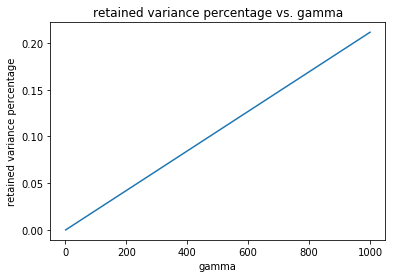

In [3]:
# (a) retained variance
tf_square_arr = np.dot(tf_vec.toarray(),tf_vec.toarray().T)
l = tf_square_arr.shape[0]
eigen_values = tf_square_arr[range(l),range(l)]
retained_variance = []
n = 1000
for i in range(1,n+1):
    retained_variance.append(np.sum(eigen_values[:i]))
plt.plot(range(1,n+1),retained_variance/np.sum(eigen_values))
plt.title('retained variance percentage vs. gamma')
plt.ylabel('retained variance percentage')
plt.xlabel('gamma')

In [ ]:
rs = [1,2,3,5,10,20,50,100,300]
score_names = ["V-measure-score","homogeneity-score","completeness_score","adjusted_rand_score",
               "adjusted_mutual_info_score"]

svd_scores = np.zeros([len(score_names),len(rs)])
nmf_scores = np.zeros([len(score_names),len(rs)])
# LSI
for i in range(len(rs)):
    r = rs[i]
    print 'runing LSI with r = %d' % r
    tsvd = TruncatedSVD(n_components=r)
    reduced_tf = tsvd.fit_transform(tf_vec.toarray())
    print 'training k means clustering with LSI'
    km = KMeans(n_clusters=kn, random_state=0).fit(reduced_tf)
    print 'recording scores'
    svd_scores[0,i] = v_measure_score(train_label,km.labels_)
    svd_scores[1,i] = homogeneity_score(train_label,km.labels_)
    svd_scores[2,i] = completeness_score(train_label,km.labels_)
    svd_scores[3,i] = adjusted_rand_score(train_label,km.labels_)
    svd_scores[4,i] = adjusted_mutual_info_score(train_label,km.labels_)
    
for i in range(len(score_names)):
    plt.figure()
    plt.plot(rs,svd_scores[i,:])
    plt.title(score_names[i] + 'vs. r')
    plt.ylabel(score_names[i])
    plt.xlabel('r')
    
    

runing LSI with r = 1


In [5]:
    
for i in range(len(rs)):
    r = rs[i]
    # NMF
    print 'runing NMF with r = %d' % r
    nmf = NMF(n_components=r, init='random', random_state=0)
    print 'training k means clustering with NMF'
    nmf_tf = nmf.fit_transform(tf_vec.toarray())
    nmf_scores[0,i] = v_measure_score(train_label,km.labels_)
    nmf_scores[1,i] = homogeneity_score(train_label,km.labels_)
    nmf_scores[2,i] = completeness_score(train_label,km.labels_)
    nmf_scores[3,i] = adjusted_rand_score(train_label,km.labels_)
    nmf_scores[4,i] = adjusted_mutual_info_score(train_label,km.labels_)
    
 

IndentationError: expected an indented block (<ipython-input-5-ad77bf8115fd>, line 3)

## Problem 3 Report